## Modeling

In this notebook, we're going to apply various machine learning approaches analyze the mouse retinal data

In [3]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
adata = ad.read_h5ad('camr_scrublet_batch_filtered.h5ad')

In [5]:
# Calculating Cluster Specific Differentially Expressed Genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.02", method="wilcoxon")


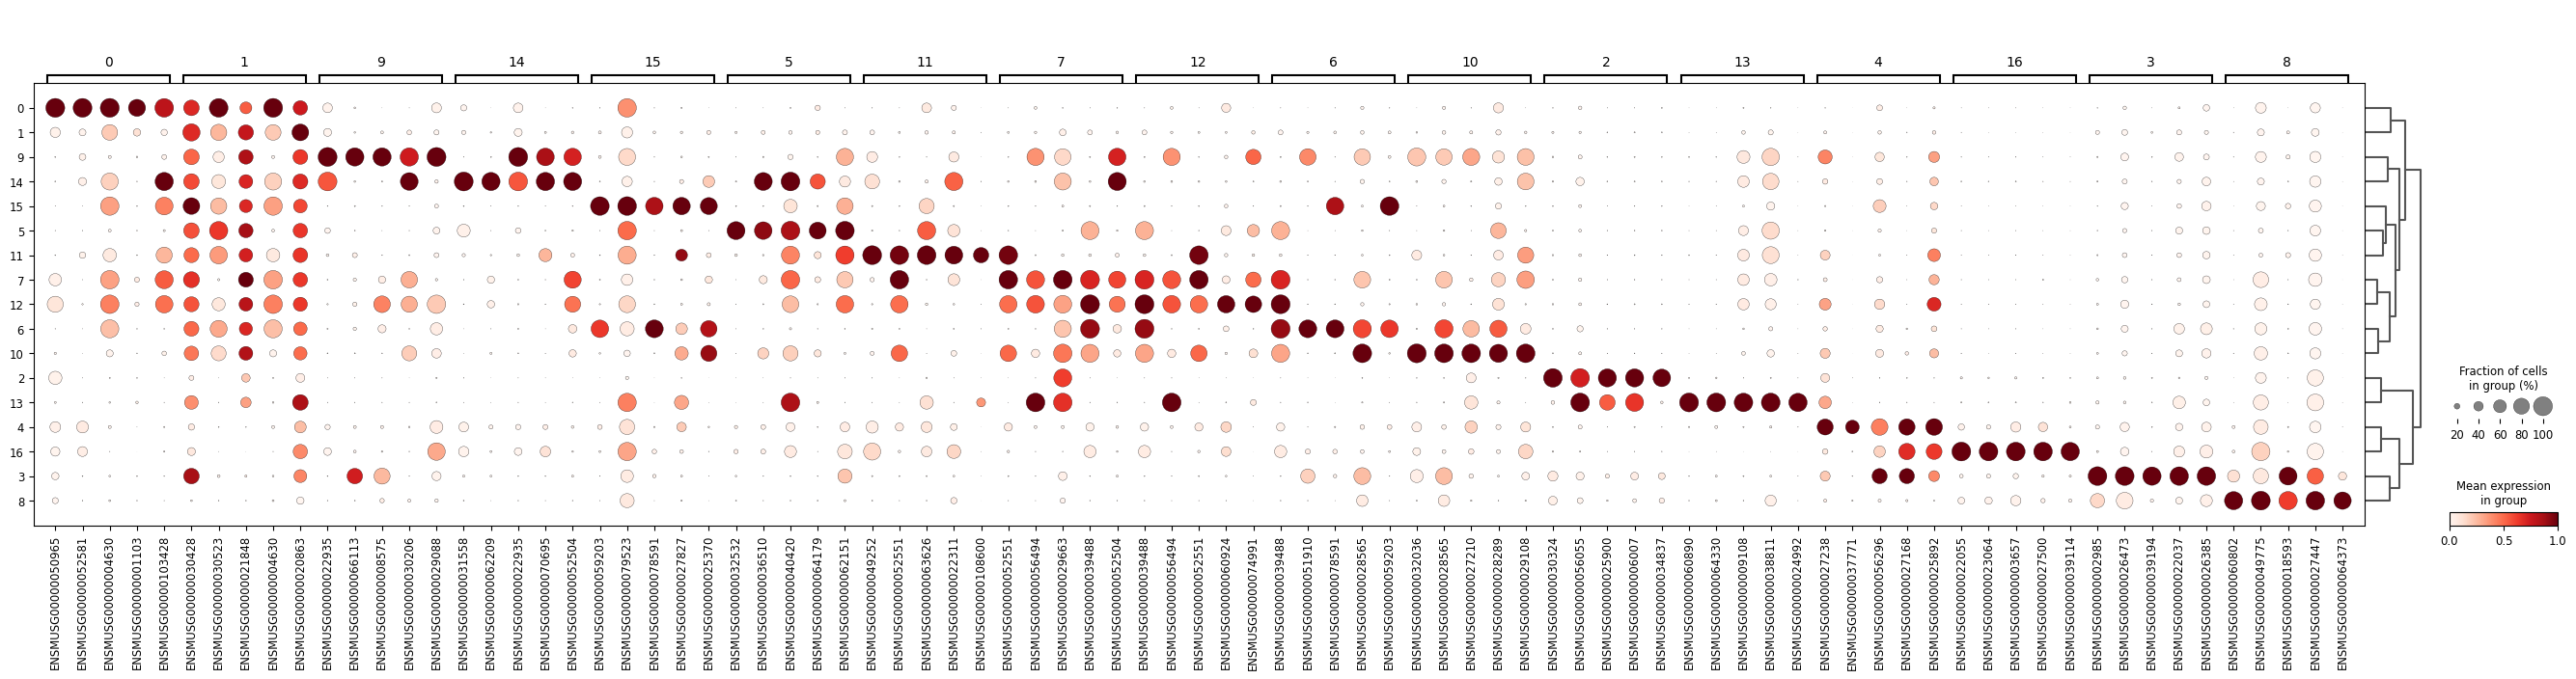

In [3]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.02", standard_scale="var", n_genes=5
)

## Normalization Sanity Check

In [ ]:
# Normalization Sanity Check
print("Raw Counts:")
print(adata.layers["raw"][:5, :5])



Raw Counts:
  (2, 2)	0.5734496116638184
  (3, 2)	0.6386954188346863
  (4, 2)	0.34429892897605896
  (4, 4)	0.34429892897605896


In [ ]:
# Print the first few rows and columns of the normalized data
print("Normalized Data:")
print(adata.X[:5, :5])

Normalized Data:
  (2, 2)	0.41708502173423767
  (3, 2)	0.4458776116371155
  (4, 2)	0.26107800006866455
  (4, 4)	0.26107800006866455


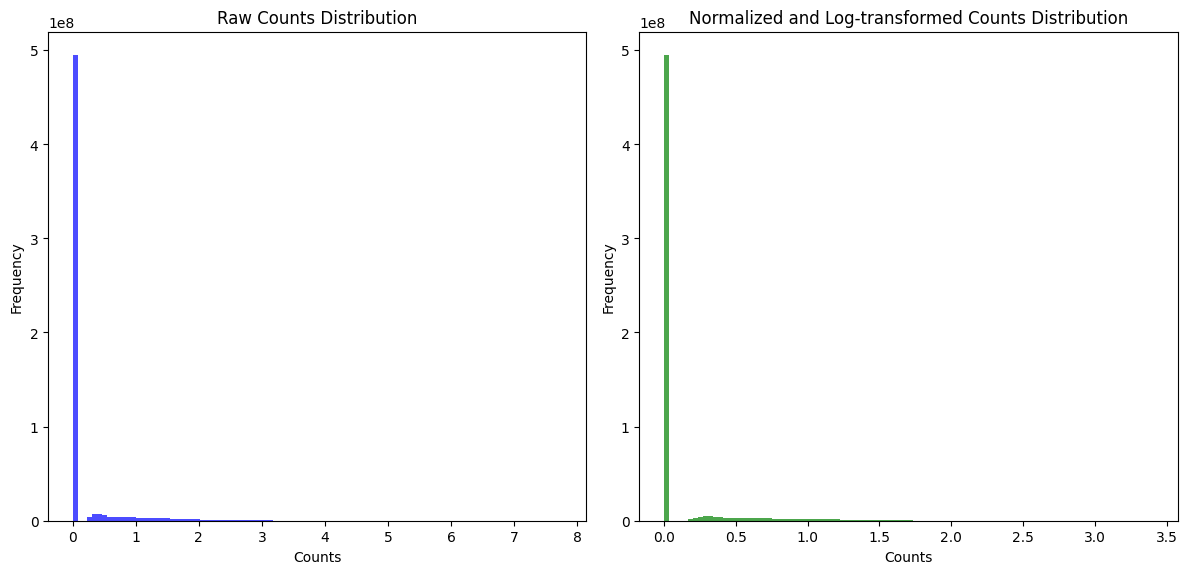

In [ ]:
import matplotlib.pyplot as plt

# Convert to dense arrays and flatten
raw_counts = adata.layers["raw"].toarray().flatten()
normalized_counts = adata.X.toarray().flatten()

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(raw_counts, bins=100, color='blue', alpha=0.7)
plt.title('Raw Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normalized_counts, bins=100, color='green', alpha=0.7)
plt.title('Normalized and Log-transformed Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Summary statistics for raw counts
print("Raw Counts Summary Statistics:")
print(f"Min: {np.min(raw_counts)}, Max: {np.max(raw_counts)}, Mean: {np.mean(raw_counts)}, Std: {np.std(raw_counts)}")

# Summary statistics for normalized and log-transformed counts
print("Normalized and Log-transformed Counts Summary Statistics:")
print(f"Min: {np.min(normalized_counts)}, Max: {np.max(normalized_counts)}, Mean: {np.mean(normalized_counts)}, Std: {np.std(normalized_counts)}")


Raw Counts Summary Statistics:
Min: 0.0, Max: 7.755390644073486, Mean: 0.18239399790763855, Std: 0.5289703011512756
Normalized and Log-transformed Counts Summary Statistics:
Min: 0.0, Max: 3.404916524887085, Mean: 0.11371065676212311, Std: 0.30618733167648315


## Quality of Life

In [ ]:
import dill

# Save the entire session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'wb') as f:
    dill.dump_session(f)

In [2]:
import dill

# Load the saved session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'rb') as f:
    dill.load_session(f)